Libraries imported successfully!

Dataset loaded. Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], Target: ['setosa' 'versicolor' 'virginica']
Features normalized (Standardized).
Data split: 105 training samples, 45 testing samples.

Optimal K found: K=9 with Accuracy: 0.9556


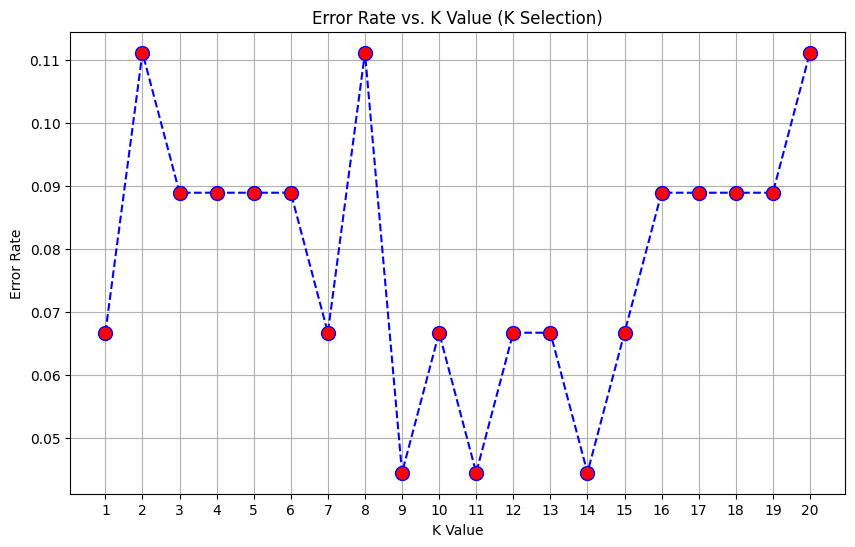


Final Model Evaluation (K=9):
Test Accuracy: 0.9556

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


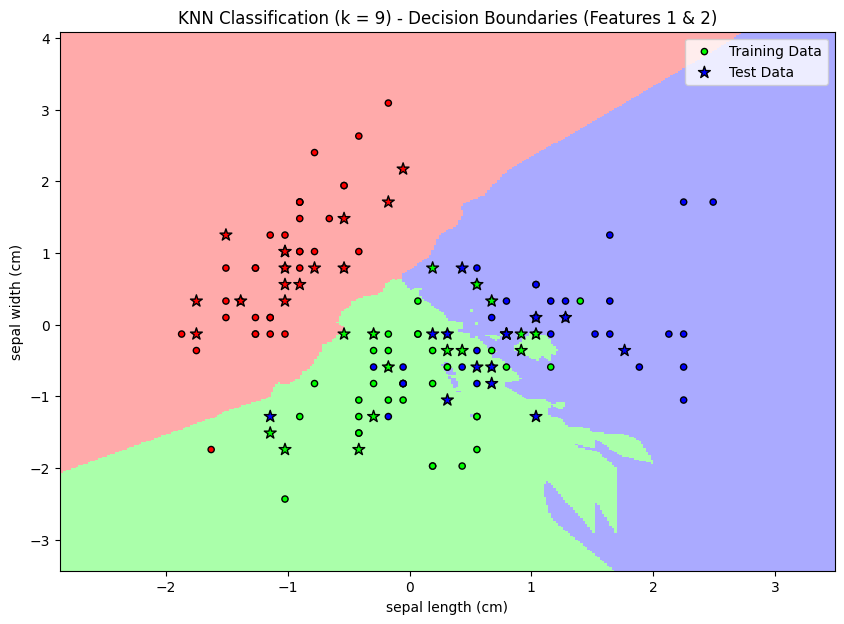


Task Complete!
Don't forget to upload your code, dataset, screenshots, and a README.md to a new GitHub repository for submission!


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For Normalization [cite: 6]
from sklearn.neighbors import KNeighborsClassifier # For KNN Model [cite: 7]
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # For Evaluation [cite: 9]

print("Libraries imported successfully!")

# ----------------------------------------------------------------------
# 1. Choose & Load Data (Using Iris Dataset as recommended) [cite: 11]
# ----------------------------------------------------------------------

# Load the built-in Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for better visualization (Optional, but helpful)
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Series(y).map(dict(enumerate(target_names)))

print(f"\nDataset loaded. Features: {feature_names}, Target: {target_names}")

# ----------------------------------------------------------------------
# 2. Preprocess & Normalize Features [cite: 6]
# ----------------------------------------------------------------------

# Normalize features using StandardScaler (also called Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features normalized (Standardized).")

# ----------------------------------------------------------------------
# 3. Split Data
# ----------------------------------------------------------------------

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

print(f"Data split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# ----------------------------------------------------------------------
# 4 & 5. Implement KNN and Experiment with K [cite: 7, 8]
# ----------------------------------------------------------------------

# List to store the error rate for different K values
error_rate = []
max_k = 20 # Experimenting up to K=20 [cite: 8]
best_k = 0
best_accuracy = 0

for i in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)

    # Store error rate (1 - accuracy)
    error_rate.append(1 - accuracy_i)

    # Find the best K
    if accuracy_i > best_accuracy:
        best_accuracy = accuracy_i
        best_k = i

print(f"\nOptimal K found: K={best_k} with Accuracy: {best_accuracy:.4f}")

# Plotting the Error Rate vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value (K Selection)')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 6. Evaluate Model (Using the optimal K) [cite: 9]
# ----------------------------------------------------------------------

# Re-train with the best K
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

# Calculate Accuracy
final_accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Model Evaluation (K={best_k}):")
print(f"Test Accuracy: {final_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
#

# Classification Report (detailed metrics)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# ----------------------------------------------------------------------
# 7. Visualize Decision Boundaries (using the first two features) [cite: 10]
# ----------------------------------------------------------------------

# For visualization, we'll use only the first two features (Sepal Length and Sepal Width)
X_vis = X_scaled[:, :2] # Only take the first two features for 2D plot
y_vis = y

# Split again with 2 features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.30, random_state=42, stratify=y_vis
)

# Train the KNN model on 2 features with the best K
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot the training points
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=cmap_bold,
            edgecolor='k', s=20, label='Training Data')

# Plot the testing points
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, cmap=cmap_bold,
            edgecolor='k', s=80, marker='*', label='Test Data')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN Classification (k = {best_k}) - Decision Boundaries (Features 1 & 2)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

# ----------------------------------------------------------------------
# 8. Submission Reminder [cite: 38, 40]
# ----------------------------------------------------------------------

print("\nTask Complete!")
print("Don't forget to upload your code, dataset, screenshots, and a README.md to a new GitHub repository for submission!")